**House price prediction using Linear Regression**


**Get understanding about dataset**<br>

There are 14 variables in the dataset.<br>
1.CRIM-Per capita crime rate by town<br>
2.ZN-propotion of resedential land zoned for lots over 25,000 sqft<br>
3.INDUS-proportion of non-retail business acres per town<br>
4.CHAS-charles river dummy variable(1 if tract bounds river;0 otherwise)<br>
5.NOX-nitric oxides concentration(parts per 10 million)<br>
6.RM-average number of rooms per dwelling<br>
7.AGE-proportion of owner-occupies units built prior to 1940<br>
8.DIS-weighted distances to five boston employment centres<br>
9.RAD-index of accessibility to radial highways<br>
10.TAX-full value property tax rate per  dollar 10000<br>
11.PTRATIO-pupil-teacher ratio by town<br>
12.B-1000(Bk-0.63)^2 where Bk is the proportion of blacks by town<br>
13.LSTAT-%lower status of the population<br>
14.MDEV-median value of owner-occupied homes in $1000's





**Impoting library**

In [1]:
import pandas as pd


In [ ]:
import numpy as np

**Import data**

In [4]:
df=pd.read_csv(r'/content/archive (2).zip')

**Get the fisrt 5 rows of the datframe**

In [5]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Get information of the dataframe**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


**Get the summary statistics**

In [7]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Get column names**

In [8]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

**Get shape of the datframe**

In [9]:
df.shape

(506, 15)

**Get y(dependent or label or taget variable) and X(independent or features or attribute variable)**

In [10]:
y=df['medv']

In [11]:
y.shape

(506,)

In [12]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [13]:
X=df[['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']]

In [14]:
X.shape

(506, 14)

In [15]:
X

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


**Get X variables standardized**<br>
standardization of datsets is a common requirement for many machine learning estimators implemented in scikit-learn;they might behave badly if the individual features do not more or less look like standard normally distributed data:Guassian with zero mean and unit variance.
Next approach is go for minmaxscaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mm=MinMaxScaler()

In [18]:
X=mm.fit_transform(X)

In [19]:
X

array([[0.00000000e+00, 0.00000000e+00, 1.80000000e-01, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [1.98019802e-03, 2.35922539e-04, 0.00000000e+00, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [3.96039604e-03, 2.35697744e-04, 0.00000000e+00, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [9.96039604e-01, 6.11892474e-04, 0.00000000e+00, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [9.98019802e-01, 1.16072990e-03, 0.00000000e+00, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [1.00000000e+00, 4.61841693e-04, 0.00000000e+00, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

**Get train test split**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2259)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 14), (152, 14), (354,), (152,))

**Get model train**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

**Get model predicion**

In [28]:
y_pred=lr.predict(X_test)

In [29]:
y_pred.shape

(152,)

In [30]:
y_pred

array([28.41281123, 39.83487526, 18.82766555, 17.65753826, 24.63767486,
       19.94782218, 22.70030327, 15.14442704, 16.24617768, 12.29978709,
       34.59275625, 19.90275273, 34.83513124, 27.36348167, 25.28309793,
       24.12845792,  7.63157779, 33.23618216, 10.43931923, 32.56992918,
       29.85613152, 17.62179183, 17.63719586, 13.16416775, 27.43196858,
       24.07497079, 33.56231613, 13.7031865 , 16.13351387,  3.35668128,
       16.36670528, 19.58815385, 27.83044018, 29.38622756, 19.63287071,
        4.7445447 , 15.79533315, 18.85435982, 35.93376128, 13.29368661,
       38.1579402 , 22.80813239, 22.26069131, 27.25578119, 17.33486925,
       22.28923925,  8.87509637, 19.35695808,  6.45467573, 24.25239256,
       19.5737891 , 24.34375048, 21.82066869, 32.10124067, 18.23232109,
       28.57795901, 19.86224009, 34.60208573,  8.95073683, 19.36263493,
       22.19102591, 27.22168193, 28.63164366, 20.45034569, 16.70980381,
       25.01163587, 22.08908084,  8.47144695, 30.27613798, 31.65

**Get model evaluation**

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
mean_squared_error(y_test,y_pred)

27.09137000196771

In [34]:
mean_absolute_error(y_test,y_pred)

3.6504672244226053

In [35]:
r2_score(y_test,y_pred)

0.7162172831620932

**Get visualization of actual vs predicte results**

In [36]:
import matplotlib.pyplot as plt

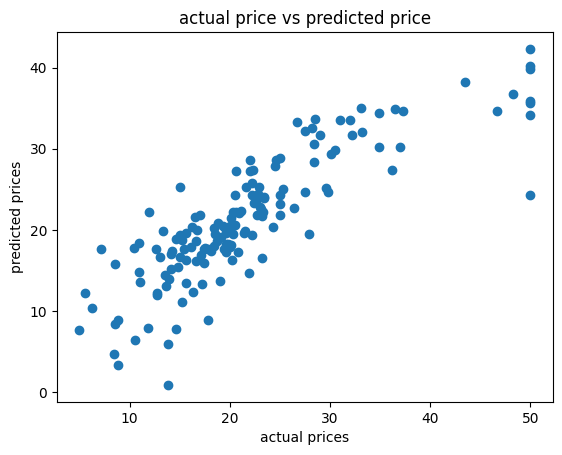

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual price vs predicted price")
plt.show()

**Get future predictions**<br>
lets select a random sample from existing dataset as new value<br>
steps to follow<br>
1.Extract a random row using sample function<br>
2.Separate X and y<br>
3.Standardize X<br>
4.Predict

In [39]:
X_new=df.sample(1)

In [40]:
X_new

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
423,424,7.05042,0.0,18.1,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4


In [41]:
X_new.shape

(1, 15)

In [43]:
X_new=X_new.drop('medv',axis=1)

In [44]:
X_new

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
423,424,7.05042,0.0,18.1,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29


In [45]:
X_new.shape

(1, 14)

In [46]:
X_new=mm.fit_transform(X_new)

In [48]:
y_pred_new=lr.predict(X_new)

In [49]:
y_pred_new

array([24.94964674])